In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Read api key
from api_keys import g_key

# Output File (CSV)
data_city = "GlobalLandTemperaturesByCity.csv"
data_country = "GlobalLandTemperaturesByCountry.csv"
data_majorcity = "GlobalLandTemperaturesByMajorCity.csv"
data_state = "GlobalLandTemperaturesByState.csv"
data_global = "GlobalTemperatures.csv"

ModuleNotFoundError: No module named 'api_keys'

In [2]:
city_df = pd.read_csv(data_city) 
city_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [3]:
country_df = pd.read_csv(data_country) 
country_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [4]:
majorcity_df = pd.read_csv(data_majorcity) 
majorcity_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [5]:
state_df = pd.read_csv(data_state) 
state_df

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [6]:
global_df = pd.read_csv(data_global) 
global_df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [7]:
cleancities_df = city_df.rename(columns={'dt':'Date'})
cleancities_df = city_df.dropna(how='any')
cleancities_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E


In [8]:
sorted_df = cleancities_df.sort_values("dt")
sorted_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
7409909,1743-11-01,-2.971,2.369,Tambov,Russia,52.24N,42.04E
6528013,1743-11-01,5.593,1.868,Saint Étienne,France,45.81N,3.46E
5497681,1743-11-01,-3.011,2.160,Orekhovo Zuevo,Russia,55.45N,39.69E
2645561,1743-11-01,1.939,2.100,Grand Rapids,United States,42.59N,85.09W
...,...,...,...,...,...,...,...
7965635,2013-09-01,15.252,1.056,Vancouver,Canada,49.03N,122.45W
4116227,2013-09-01,19.373,1.054,Lakewood,United States,39.38N,104.05W
4805334,2013-09-01,27.652,1.087,Miami,United States,26.52N,80.60W
6628996,2013-09-01,28.315,1.126,San Cristóbal,Dominican Republic,18.48N,69.30W


In [9]:
sorted_df = sorted_df.reset_index()
sorted_df

,index,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,7409909,1743-11-01,-2.971,2.369,Tambov,Russia,52.24N,42.04E
2,6528013,1743-11-01,5.593,1.868,Saint Étienne,France,45.81N,3.46E
3,5497681,1743-11-01,-3.011,2.160,Orekhovo Zuevo,Russia,55.45N,39.69E
4,2645561,1743-11-01,1.939,2.100,Grand Rapids,United States,42.59N,85.09W
...,...,...,...,...,...,...,...,...
8235077,7965635,2013-09-01,15.252,1.056,Vancouver,Canada,49.03N,122.45W
8235078,4116227,2013-09-01,19.373,1.054,Lakewood,United States,39.38N,104.05W
8235079,4805334,2013-09-01,27.652,1.087,Miami,United States,26.52N,80.60W
8235080,6628996,2013-09-01,28.315,1.126,San Cristóbal,Dominican Republic,18.48N,69.30W


In [10]:
sorted_df = sorted_df.reset_index()
del sorted_df['index']
sorted_df

,level_0,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1,1743-11-01,-2.971,2.369,Tambov,Russia,52.24N,42.04E
2,2,1743-11-01,5.593,1.868,Saint Étienne,France,45.81N,3.46E
3,3,1743-11-01,-3.011,2.160,Orekhovo Zuevo,Russia,55.45N,39.69E
4,4,1743-11-01,1.939,2.100,Grand Rapids,United States,42.59N,85.09W
...,...,...,...,...,...,...,...,...
8235077,8235077,2013-09-01,15.252,1.056,Vancouver,Canada,49.03N,122.45W
8235078,8235078,2013-09-01,19.373,1.054,Lakewood,United States,39.38N,104.05W
8235079,8235079,2013-09-01,27.652,1.087,Miami,United States,26.52N,80.60W
8235080,8235080,2013-09-01,28.315,1.126,San Cristóbal,Dominican Republic,18.48N,69.30W


In [11]:
sorted_df.dtypes

level_0                            int64
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [12]:
sorted_df['dt'] = pd.to_datetime(sorted_df['dt'])
sorted_df

,level_0,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1,1743-11-01,-2.971,2.369,Tambov,Russia,52.24N,42.04E
2,2,1743-11-01,5.593,1.868,Saint Étienne,France,45.81N,3.46E
3,3,1743-11-01,-3.011,2.160,Orekhovo Zuevo,Russia,55.45N,39.69E
4,4,1743-11-01,1.939,2.100,Grand Rapids,United States,42.59N,85.09W
...,...,...,...,...,...,...,...,...
8235077,8235077,2013-09-01,15.252,1.056,Vancouver,Canada,49.03N,122.45W
8235078,8235078,2013-09-01,19.373,1.054,Lakewood,United States,39.38N,104.05W
8235079,8235079,2013-09-01,27.652,1.087,Miami,United States,26.52N,80.60W
8235080,8235080,2013-09-01,28.315,1.126,San Cristóbal,Dominican Republic,18.48N,69.30W


In [13]:
mask = (sorted_df['dt'] > '1899-12-31')
sorted_df.loc[mask]
clean_df = sorted_df.loc[mask]
clean_df

,level_0,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3447002,3447002,1900-01-01,4.299,0.504,Tours,France,47.42N,1.18E
3447003,3447003,1900-01-01,-3.474,1.022,Reykjavík,Iceland,65.09N,21.06W
3447004,3447004,1900-01-01,-12.710,0.849,Serpukhov,Russia,55.45N,36.85E
3447005,3447005,1900-01-01,1.766,1.436,Jiujiang,China,29.74N,116.31E
3447006,3447006,1900-01-01,4.271,0.625,Vitoria,Spain,42.59N,2.18W
...,...,...,...,...,...,...,...,...
8235077,8235077,2013-09-01,15.252,1.056,Vancouver,Canada,49.03N,122.45W
8235078,8235078,2013-09-01,19.373,1.054,Lakewood,United States,39.38N,104.05W
8235079,8235079,2013-09-01,27.652,1.087,Miami,United States,26.52N,80.60W
8235080,8235080,2013-09-01,28.315,1.126,San Cristóbal,Dominican Republic,18.48N,69.30W


In [14]:
clean_df = clean_df.reset_index()
del clean_df['index']
del clean_df['level_0']
clean_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1900-01-01,4.299,0.504,Tours,France,47.42N,1.18E
1,1900-01-01,-3.474,1.022,Reykjavík,Iceland,65.09N,21.06W
2,1900-01-01,-12.710,0.849,Serpukhov,Russia,55.45N,36.85E
3,1900-01-01,1.766,1.436,Jiujiang,China,29.74N,116.31E
4,1900-01-01,4.271,0.625,Vitoria,Spain,42.59N,2.18W
...,...,...,...,...,...,...,...
4788075,2013-09-01,15.252,1.056,Vancouver,Canada,49.03N,122.45W
4788076,2013-09-01,19.373,1.054,Lakewood,United States,39.38N,104.05W
4788077,2013-09-01,27.652,1.087,Miami,United States,26.52N,80.60W
4788078,2013-09-01,28.315,1.126,San Cristóbal,Dominican Republic,18.48N,69.30W


In [15]:
clean_df['year'] = pd.DatetimeIndex(clean_df['dt']).year
clean_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1900-01-01,4.299,0.504,Tours,France,47.42N,1.18E,1900
1,1900-01-01,-3.474,1.022,Reykjavík,Iceland,65.09N,21.06W,1900
2,1900-01-01,-12.710,0.849,Serpukhov,Russia,55.45N,36.85E,1900
3,1900-01-01,1.766,1.436,Jiujiang,China,29.74N,116.31E,1900
4,1900-01-01,4.271,0.625,Vitoria,Spain,42.59N,2.18W,1900


In [16]:
clean_df.drop('City', axis=1)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude,year
0,1900-01-01,4.299,0.504,France,47.42N,1.18E,1900
1,1900-01-01,-3.474,1.022,Iceland,65.09N,21.06W,1900
2,1900-01-01,-12.710,0.849,Russia,55.45N,36.85E,1900
3,1900-01-01,1.766,1.436,China,29.74N,116.31E,1900
4,1900-01-01,4.271,0.625,Spain,42.59N,2.18W,1900
...,...,...,...,...,...,...,...
4788075,2013-09-01,15.252,1.056,Canada,49.03N,122.45W,2013
4788076,2013-09-01,19.373,1.054,United States,39.38N,104.05W,2013
4788077,2013-09-01,27.652,1.087,United States,26.52N,80.60W,2013
4788078,2013-09-01,28.315,1.126,Dominican Republic,18.48N,69.30W,2013


In [17]:
clean2_df=clean_df.drop(['AverageTemperatureUncertainty', 'City', 'dt'], axis=1)
clean2_df

,AverageTemperature,Country,Latitude,Longitude,year
0,4.299,France,47.42N,1.18E,1900
1,-3.474,Iceland,65.09N,21.06W,1900
2,-12.710,Russia,55.45N,36.85E,1900
3,1.766,China,29.74N,116.31E,1900
4,4.271,Spain,42.59N,2.18W,1900
...,...,...,...,...,...
4788075,15.252,Canada,49.03N,122.45W,2013
4788076,19.373,United States,39.38N,104.05W,2013
4788077,27.652,United States,26.52N,80.60W,2013
4788078,28.315,Dominican Republic,18.48N,69.30W,2013


In [18]:
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
group_names = ["1900-1909", "1910-1919", "1920-1929", "1930-1939", "1940-1949", "1950-1959", "1960-1969", "1970-1979", "1980-1989", "1990-1999", "2000-2009", "2010-2019"]
clean2_df["Decade"] = pd.cut(clean2_df["year"], bins, labels=group_names, include_lowest=True)
clean2_df

,AverageTemperature,Country,Latitude,Longitude,year,Decade
0,4.299,France,47.42N,1.18E,1900,1900-1909
1,-3.474,Iceland,65.09N,21.06W,1900,1900-1909
2,-12.710,Russia,55.45N,36.85E,1900,1900-1909
3,1.766,China,29.74N,116.31E,1900,1900-1909
4,4.271,Spain,42.59N,2.18W,1900,1900-1909
...,...,...,...,...,...,...
4788075,15.252,Canada,49.03N,122.45W,2013,2010-2019
4788076,19.373,United States,39.38N,104.05W,2013,2010-2019
4788077,27.652,United States,26.52N,80.60W,2013,2010-2019
4788078,28.315,Dominican Republic,18.48N,69.30W,2013,2010-2019


In [32]:
groupby = clean2_df.groupby(['Decade', 'Country']).agg({'AverageTemperature': ['mean', 'min', 'max']})
groupby

AverageTemperature                
                                    mean     min     max
Decade    Country                                       
1900-1909 Afghanistan          13.486742  -7.057  31.911
          Albania              15.355129   3.366  24.412
          Algeria              17.419008   4.270  36.380
          Angola               21.411485  15.368  27.038
          Argentina            16.748540  -0.874  28.703
...                                  ...     ...     ...
2010-2019 Venezuela            26.223287  20.621  30.929
          Vietnam              25.604984   9.874  31.286
          Yemen                26.999594  21.333  30.303
          Zambia               21.208328  15.876  28.012
          Zimbabwe             20.070290  13.677  24.520

[1908 rows x 3 columns]

In [33]:
idx = pd.IndexSlice
main_country=groupby.loc[idx[:,['Brazil', 'India', 'Russia', 'United States', 'China']], :]
main_country

AverageTemperature                
                                      mean     min     max
Decade    Country                                         
1900-1909 Brazil                 21.731232  10.938  29.529
1910-1919 Brazil                 21.785898   9.954  29.777
1920-1929 Brazil                 21.915740  10.053  29.751
1930-1939 Brazil                 22.087598  10.520  29.851
1940-1949 Brazil                 22.017490   9.591  29.535
1950-1959 Brazil                 22.129007   9.736  29.550
1960-1969 Brazil                 22.194913  10.477  29.966
1970-1979 Brazil                 22.216532  10.590  30.013
1980-1989 Brazil                 22.440585  10.884  30.042
1990-1999 Brazil                 22.684991  10.348  30.495
2000-2009 Brazil                 22.954353  10.834  30.332
2010-2019 Brazil                 22.812554  11.637  30.226
1900-1909 India                  25.352774  -5.045  37.056
1910-1919 India                  25.310148  -2.705  36.734
1920-1929 India                  25.440423  -4.548  36.838
1930-1939 India                  25.376166  -4.299  36.556
1940-1949 India                  25.555022  -3.136  36.863
1950-1959 India                  25.745462  -3.033  36.616
1960-1969 India                  25.588322  -3.728  36.393
1970-1979 India                  25.685215  -2.348  36.786
1980-1989 India                  25.817004  -1.460  36.957
1990-1999 India                  25.911732  -2.246  37.522
2000-2009 India                  26.214004  -2.787  37.444
2010-2019 India                  26.242943  -2.298  36.856
1900-1909 Russia                  2.911633 -38.693  26.493
1910-1919 Russia                  2.888622 -39.038  25.556
1920-1929 Russia                  3.069752 -38.715  26.524
1930-1939 Russia                  3.383991 -36.892  27.534
1940-1949 Russia                  3.027362 -35.736  26.468
1950-1959 Russia                  3.189234 -37.869  28.190
1960-1969 Russia                  3.330054 -39.919  27.489
1970-1979 Russia                  3.513233 -42.704  27.005
1980-1989 Russia                  3.914482 -36.446  27.091
1990-1999 Russia                  4.144478 -38.447  27.259
2000-2009 Russia                  4.707424 -38.389  29.253
2010-2019 Russia                  4.832763 -35.758  28.690
1900-1909 United States          14.041142 -25.163  33.410
1910-1919 United States          13.942985 -24.256  32.714
1920-1929 United States          14.303249 -21.747  32.823
1930-1939 United States          14.614768 -22.652  33.722
1940-1949 United States          14.417273 -24.588  33.354
1950-1959 United States          14.554490 -21.677  33.591
1960-1969 United States          14.246483 -22.036  33.566
1970-1979 United States          14.333265 -24.159  33.533
1980-1989 United States          14.647974 -23.169  33.436
1990-1999 United States          14.857456 -19.447  33.513
2000-2009 United States          15.065226 -17.981  34.379
2010-2019 United States          15.762313 -22.628  34.236
1900-1909 China                  12.469679 -31.692  29.590
1910-1919 China                  12.455122 -32.272  30.654
1920-1929 China                  12.766794 -34.940  30.868
1930-1939 China                  12.825348 -32.134  31.233
1940-1949 China                  13.133143 -31.673  30.915
1950-1959 China                  12.889318 -30.507  30.821
1960-1969 China                  12.951351 -30.910  30.971
1970-1979 China                  12.996214 -30.628  31.314
1980-1989 China                  13.133964 -28.305  31.018
1990-1999 China                  13.451249 -28.604  30.858
2000-2009 China                  13.769272 -29.840  31.799
2010-2019 China                  13.685642 -30.193  31.171

In [34]:
china_country = clean2_df[clean2_df['Country']=="China"]
china_country

,AverageTemperature,Country,Latitude,Longitude,year,Decade
3,1.766,China,29.74N,116.31E,1900,1900-1909
18,-13.892,China,36.17N,101.44E,1900,1900-1909
58,-4.506,China,36.17N,117.35E,1900,1900-1909
61,-2.772,China,34.56N,114.81E,1900,1900-1909
75,-0.750,China,32.95N,106.28E,1900,1900-1909
...,...,...,...,...,...,...
4787619,28.552,China,21.70N,109.90E,2013,2010-2019
4787625,25.374,China,39.38N,124.86E,2013,2010-2019
4787627,28.497,China,29.74N,105.23E,2013,2010-2019
4787636,21.568,China,47.42N,124.34E,2013,2010-2019


In [35]:
india_country = clean2_df[clean2_df['Country']=="India"]
india_country

,AverageTemperature,Country,Latitude,Longitude,year,Decade
10,12.202,India,29.74N,75.69E,1900,1900-1909
12,13.578,India,28.13N,75.45E,1900,1900-1909
17,17.994,India,23.31N,76.02E,1900,1900-1909
24,26.574,India,10.45N,76.09E,1900,1900-1909
25,17.630,India,24.92N,86.90E,1900,1900-1909
...,...,...,...,...,...,...
4787516,29.654,India,26.52N,73.43E,2013,2010-2019
4787585,29.608,India,24.92N,86.90E,2013,2010-2019
4787606,27.735,India,21.70N,83.94E,2013,2010-2019
4787628,29.330,India,28.13N,79.09E,2013,2010-2019


In [36]:
brazil_country = clean2_df[clean2_df['Country']=="Brazil"]
brazil_country

,AverageTemperature,Country,Latitude,Longitude,year,Decade
31,24.300,Brazil,21.70S,49.33W,1900,1900-1909
36,22.843,Brazil,23.31S,48.06W,1900,1900-1909
51,22.124,Brazil,20.09S,44.36W,1900,1900-1909
53,22.824,Brazil,23.31S,44.56W,1900,1900-1909
89,24.300,Brazil,21.70S,49.33W,1900,1900-1909
...,...,...,...,...,...,...
4787496,24.413,Brazil,10.45S,36.82W,2013,2010-2019
4787497,20.582,Brazil,20.09S,44.36W,2013,2010-2019
4787512,20.787,Brazil,21.70S,47.60W,2013,2010-2019
4787591,23.237,Brazil,20.09S,39.24W,2013,2010-2019


In [37]:
russia_country = clean2_df[clean2_df['Country']=="Russia"]
russia_country

,AverageTemperature,Country,Latitude,Longitude,year,Decade
2,-12.710,Russia,55.45N,36.85E,1900,1900-1909
5,-12.710,Russia,55.45N,36.85E,1900,1900-1909
62,-5.297,Russia,42.59N,43.64E,1900,1900-1909
87,-5.297,Russia,42.59N,43.64E,1900,1900-1909
88,-22.014,Russia,53.84N,55.91E,1900,1900-1909
...,...,...,...,...,...,...
4787391,22.461,Russia,42.59N,48.00E,2013,2010-2019
4787428,18.849,Russia,53.84N,39.55E,2013,2010-2019
4787430,16.798,Russia,58.66N,40.00E,2013,2010-2019
4787503,15.651,Russia,53.84N,58.64E,2013,2010-2019


In [38]:
decade_country = clean2_df.groupby(['Decade', 'Country']).agg({'AverageTemperature': ['mean', 'min', 'max']})
decade_country

AverageTemperature                
                                    mean     min     max
Decade    Country                                       
1900-1909 Afghanistan          13.486742  -7.057  31.911
          Albania              15.355129   3.366  24.412
          Algeria              17.419008   4.270  36.380
          Angola               21.411485  15.368  27.038
          Argentina            16.748540  -0.874  28.703
...                                  ...     ...     ...
2010-2019 Venezuela            26.223287  20.621  30.929
          Vietnam              25.604984   9.874  31.286
          Yemen                26.999594  21.333  30.303
          Zambia               21.208328  15.876  28.012
          Zimbabwe             20.070290  13.677  24.520

[1908 rows x 3 columns]

In [39]:
idx = pd.IndexSlice

In [40]:
main_country=decade_country.loc[idx[:,['Brazil', 'India', 'Russia', 'United States', 'China']], :]
main_country

AverageTemperature                
                                      mean     min     max
Decade    Country                                         
1900-1909 Brazil                 21.731232  10.938  29.529
1910-1919 Brazil                 21.785898   9.954  29.777
1920-1929 Brazil                 21.915740  10.053  29.751
1930-1939 Brazil                 22.087598  10.520  29.851
1940-1949 Brazil                 22.017490   9.591  29.535
1950-1959 Brazil                 22.129007   9.736  29.550
1960-1969 Brazil                 22.194913  10.477  29.966
1970-1979 Brazil                 22.216532  10.590  30.013
1980-1989 Brazil                 22.440585  10.884  30.042
1990-1999 Brazil                 22.684991  10.348  30.495
2000-2009 Brazil                 22.954353  10.834  30.332
2010-2019 Brazil                 22.812554  11.637  30.226
1900-1909 India                  25.352774  -5.045  37.056
1910-1919 India                  25.310148  -2.705  36.734
1920-1929 India                  25.440423  -4.548  36.838
1930-1939 India                  25.376166  -4.299  36.556
1940-1949 India                  25.555022  -3.136  36.863
1950-1959 India                  25.745462  -3.033  36.616
1960-1969 India                  25.588322  -3.728  36.393
1970-1979 India                  25.685215  -2.348  36.786
1980-1989 India                  25.817004  -1.460  36.957
1990-1999 India                  25.911732  -2.246  37.522
2000-2009 India                  26.214004  -2.787  37.444
2010-2019 India                  26.242943  -2.298  36.856
1900-1909 Russia                  2.911633 -38.693  26.493
1910-1919 Russia                  2.888622 -39.038  25.556
1920-1929 Russia                  3.069752 -38.715  26.524
1930-1939 Russia                  3.383991 -36.892  27.534
1940-1949 Russia                  3.027362 -35.736  26.468
1950-1959 Russia                  3.189234 -37.869  28.190
1960-1969 Russia                  3.330054 -39.919  27.489
1970-1979 Russia                  3.513233 -42.704  27.005
1980-1989 Russia                  3.914482 -36.446  27.091
1990-1999 Russia                  4.144478 -38.447  27.259
2000-2009 Russia                  4.707424 -38.389  29.253
2010-2019 Russia                  4.832763 -35.758  28.690
1900-1909 United States          14.041142 -25.163  33.410
1910-1919 United States          13.942985 -24.256  32.714
1920-1929 United States          14.303249 -21.747  32.823
1930-1939 United States          14.614768 -22.652  33.722
1940-1949 United States          14.417273 -24.588  33.354
1950-1959 United States          14.554490 -21.677  33.591
1960-1969 United States          14.246483 -22.036  33.566
1970-1979 United States          14.333265 -24.159  33.533
1980-1989 United States          14.647974 -23.169  33.436
1990-1999 United States          14.857456 -19.447  33.513
2000-2009 United States          15.065226 -17.981  34.379
2010-2019 United States          15.762313 -22.628  34.236
1900-1909 China                  12.469679 -31.692  29.590
1910-1919 China                  12.455122 -32.272  30.654
1920-1929 China                  12.766794 -34.940  30.868
1930-1939 China                  12.825348 -32.134  31.233
1940-1949 China                  13.133143 -31.673  30.915
1950-1959 China                  12.889318 -30.507  30.821
1960-1969 China                  12.951351 -30.910  30.971
1970-1979 China                  12.996214 -30.628  31.314
1980-1989 China                  13.133964 -28.305  31.018
1990-1999 China                  13.451249 -28.604  30.858
2000-2009 China                  13.769272 -29.840  31.799
2010-2019 China                  13.685642 -30.193  31.171

In [41]:
year_group = clean2_df.groupby("Decade")
year_df=year_group[["AverageTemperature"]].mean()
year_df

,AverageTemperature
Decade,
1900-1909,17.341246
1910-1919,17.417624
1920-1929,17.575140
1930-1939,17.679161
1940-1949,17.774756
1950-1959,17.803116
1960-1969,17.759966
1970-1979,17.801995
1980-1989,18.017651


<AxesSubplot:xlabel='Decade'>

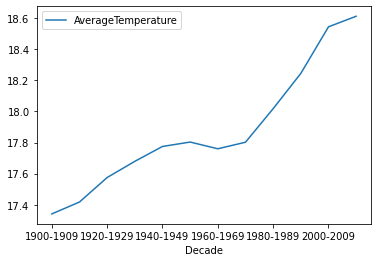

In [42]:
year_df.plot(kind='line')

In [43]:
country_group = clean2_df.groupby("Country")
country_df=country_group[["AverageTemperature"]].mean()
country_df

,AverageTemperature
Country,
Afghanistan,14.052931
Albania,15.801241
Algeria,18.024614
Angola,21.899571
Argentina,17.129626
...,...
Venezuela,25.686840
Vietnam,25.076072
Yemen,25.838402


In [47]:
main_country.to_csv('temp_data2.csv')